<div class="alert alert-danger" role="alert">
<h1 align="center"><font size = 14>Polynomial-Regularization</font></h1>
<h4 align="center">September 18-2024<h4>
<h3 align="center">Armin Amani</h3>

<div class="alert alert-danger" role="alert">
📤 Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

<div class="alert alert-danger" role="alert"> 
💾 Read CSV file

In [2]:
column_names = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIC','B','LSTAT','Price']
df = pd.read_csv('Boston_house_price.csv',delimiter='\s+',names=column_names)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIC,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIC,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
print(f"CRIM : {np.sort(df['Price'].unique())}")

CRIM : [ 5.   5.6  6.3  7.   7.2  7.4  7.5  8.1  8.3  8.4  8.5  8.7  8.8  9.5
  9.6  9.7 10.2 10.4 10.5 10.8 10.9 11.  11.3 11.5 11.7 11.8 11.9 12.
 12.1 12.3 12.5 12.6 12.7 12.8 13.  13.1 13.2 13.3 13.4 13.5 13.6 13.8
 13.9 14.  14.1 14.2 14.3 14.4 14.5 14.6 14.8 14.9 15.  15.1 15.2 15.3
 15.4 15.6 15.7 16.  16.1 16.2 16.3 16.4 16.5 16.6 16.7 16.8 17.  17.1
 17.2 17.3 17.4 17.5 17.6 17.7 17.8 17.9 18.  18.1 18.2 18.3 18.4 18.5
 18.6 18.7 18.8 18.9 19.  19.1 19.2 19.3 19.4 19.5 19.6 19.7 19.8 19.9
 20.  20.1 20.2 20.3 20.4 20.5 20.6 20.7 20.8 20.9 21.  21.1 21.2 21.4
 21.5 21.6 21.7 21.8 21.9 22.  22.1 22.2 22.3 22.4 22.5 22.6 22.7 22.8
 22.9 23.  23.1 23.2 23.3 23.4 23.5 23.6 23.7 23.8 23.9 24.  24.1 24.2
 24.3 24.4 24.5 24.6 24.7 24.8 25.  25.1 25.2 25.3 26.2 26.4 26.5 26.6
 26.7 27.  27.1 27.5 27.9 28.  28.1 28.2 28.4 28.5 28.6 28.7 29.  29.1
 29.4 29.6 29.8 29.9 30.1 30.3 30.5 30.7 30.8 31.  31.1 31.2 31.5 31.6
 31.7 32.  32.2 32.4 32.5 32.7 32.9 33.  33.1 33.2 33.3 33.4 33.8 34.6


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIC  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


<div class="alert alert-danger" role="alert"> 
🔎 Data Visualize

In [6]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIC    0
B          0
LSTAT      0
Price      0
dtype: int64

* **Data Visulaize**

c:\Users\Beethoven\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Beethoven\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Beethoven\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Beethoven\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categoric

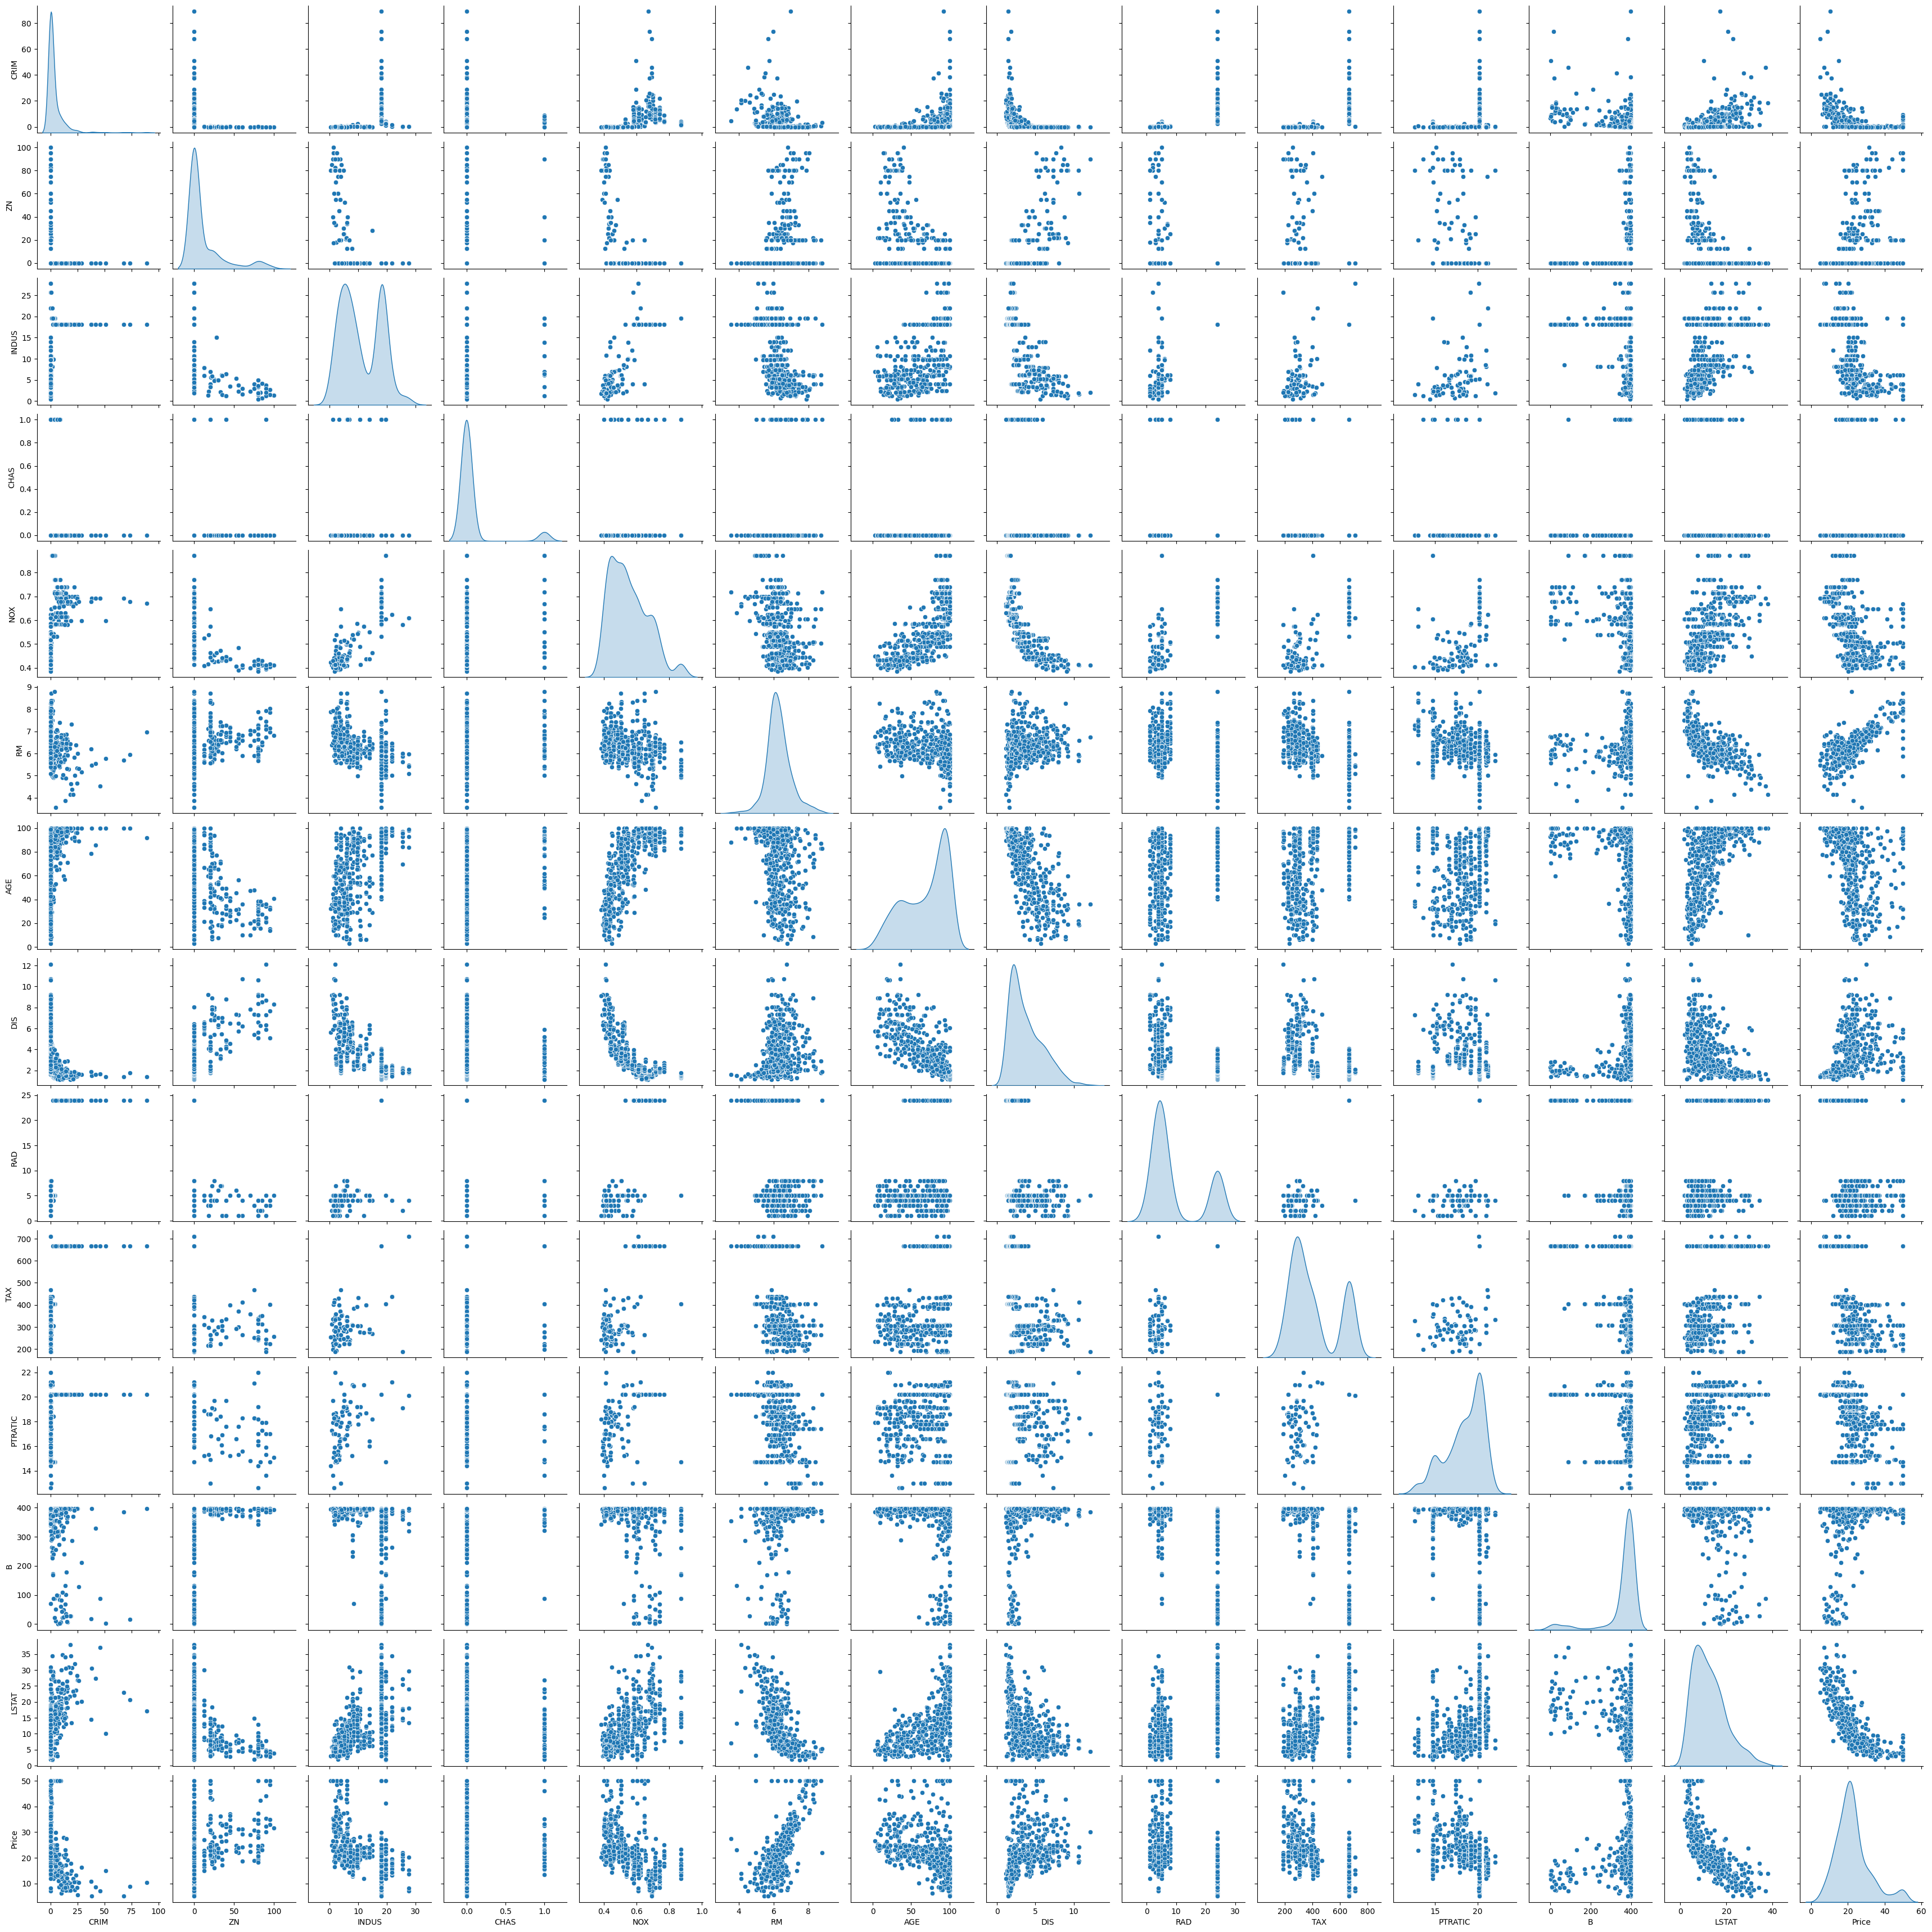

In [7]:
sns.pairplot(data=df,diag_kind='kde')

<Axes: >

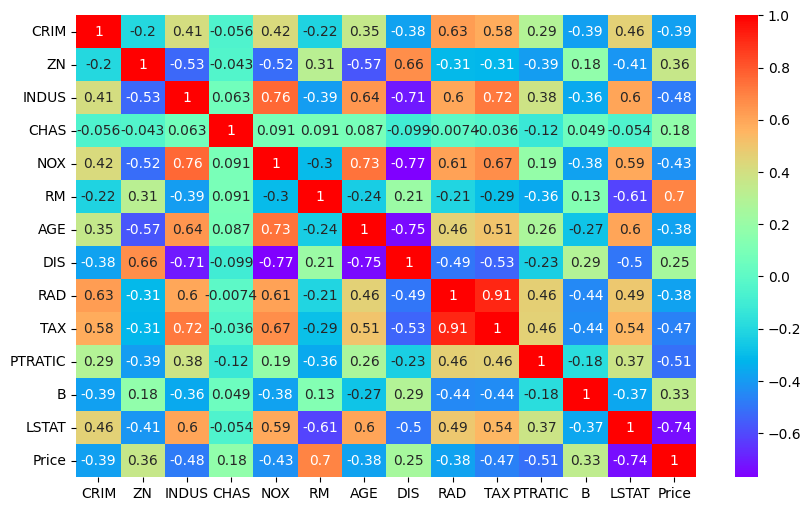

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap=plt.cm.rainbow)

<div class="alert alert-danger" role="alert"> 
🔎 Seperate X & Y

In [9]:
X = df.drop('Price',axis=1)
Y = df['Price']

In [10]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIC,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [11]:
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Price, Length: 506, dtype: float64

<div class="alert alert-danger" role="alert"> 
🔎 PolynomialModel

In [12]:
polynomial = PolynomialFeatures(degree=2,include_bias=True)
polynomial

PolynomialFeatures()

In [13]:
poly_feature = polynomial.fit_transform(X)
poly_feature

array([[1.00000000e+00, 6.32000000e-03, 1.80000000e+01, ...,
        1.57529610e+05, 1.97656200e+03, 2.48004000e+01],
       [1.00000000e+00, 2.73100000e-02, 0.00000000e+00, ...,
        1.57529610e+05, 3.62766600e+03, 8.35396000e+01],
       [1.00000000e+00, 2.72900000e-02, 0.00000000e+00, ...,
        1.54315409e+05, 1.58310490e+03, 1.62409000e+01],
       ...,
       [1.00000000e+00, 6.07600000e-02, 0.00000000e+00, ...,
        1.57529610e+05, 2.23851600e+03, 3.18096000e+01],
       [1.00000000e+00, 1.09590000e-01, 0.00000000e+00, ...,
        1.54802902e+05, 2.54955600e+03, 4.19904000e+01],
       [1.00000000e+00, 4.74100000e-02, 0.00000000e+00, ...,
        1.57529610e+05, 3.12757200e+03, 6.20944000e+01]])

In [14]:
poly_feature.shape

(506, 105)

<div class="alert alert-danger" role="alert"> 
🔎 train & test split

In [15]:
x_train , x_test , y_train , y_test = train_test_split(poly_feature,Y,test_size=0.3,random_state=101)

<div class="alert alert-danger" role="alert"> 
🔎 RidgeCV (Regularization)

In [16]:
model = RidgeCV(alphas=(1e-10,1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3),cv=5)
model

RidgeCV(alphas=(1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001), cv=5)

In [17]:
model.fit(x_train,y_train)

c:\Users\Beethoven\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=7.88675e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\Beethoven\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=7.76711e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\Beethoven\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=7.82706e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\Beethoven\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=8.01859e-24): result may not be accurate.
  ret

RidgeCV(alphas=(1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001), cv=5)

In [18]:
model.alpha_

0.001

In [19]:
print(f"coefficients : {model.coef_}")
print("*"*100)
print(f"intercept : {model.intercept_}")

coefficients : [ 0.00000000e+00  6.22496122e-01  1.93911077e-02 -3.28496100e+00
  2.45344369e-01  2.42472336e+01  1.39200243e+01  7.04196323e-01
 -1.33954375e+01  5.39279670e+00 -1.75444455e-01  4.43990772e+00
  9.20295459e-02  2.80343719e-02 -1.16868286e-04  1.19712906e-01
  1.16115179e-01  1.09266486e+00 -8.18806297e-01  1.77822260e-01
 -5.84958774e-03 -1.18917389e-01 -1.69062951e-03 -1.95195410e-03
 -7.52615839e-02 -5.35778908e-04  1.70026050e-02 -6.70259702e-04
 -7.24704891e-03 -4.65336332e-02 -9.60734185e-01  3.20847559e-02
 -6.92975113e-04 -2.11920880e-02 -3.43642080e-03  6.42033193e-04
 -7.03823499e-03  9.55550690e-04 -8.12219501e-04  1.89874660e-02
  1.11548158e-01  2.12194433e+00  4.21455139e-02  3.04913428e-03
  1.69730906e-01  3.10145478e-02 -1.78166720e-04  4.08501075e-02
  6.83362929e-04 -2.18176180e-02  2.45344369e-01 -1.49922668e+01
 -6.45513142e-01 -2.71652828e-02  1.71972255e+00 -1.51643699e-01
  1.67206335e-02 -4.50483269e-01  2.89893904e-02 -2.35145853e-02
 -1.741909

<div class="alert alert-danger" role="alert"> 
🔎 Prediction

In [20]:
y_pred = model.predict(x_test)
y_pred

array([47.88552138, 29.63951091, 16.93702839, 16.0287419 , 28.27540744,
       29.45092101, 44.12775547, 17.35643281, 35.0772401 ,  6.49879838,
       26.46904431, 13.58210991, 14.59430668, 25.00337909, 22.72307898,
       25.95692744,  8.95305539, 30.30908496, 26.97294252, 24.40976953,
        9.70675853, 23.70353662, 18.86117804, 31.47976516, 33.02841521,
       17.91032936, 27.74442034, 17.88231816, 37.02624417, 33.76692171,
       21.88232298, 17.9866591 , 36.65542957, 53.37126044, 30.77260004,
       22.06155545, 13.6540716 , 15.25797214,  4.92868301, 32.7838223 ,
       21.95194374, 21.68773556, 38.19196587, 13.95073985, 18.89905504,
       22.44896743, 29.98434148, 15.54977754, 24.41697582, 31.36529282,
       32.51399721, 35.4546297 , 18.59393517, 24.22253971, 31.14716697,
       15.51938838, 18.95601677, 18.35450733, 22.430182  , 18.8607545 ,
       35.38976582, 15.18242499, 34.57011674, 19.23481254, 10.31473718,
       24.05946047, 23.5814329 , 17.98683817, 12.35341875, 19.10

<div class="alert alert-danger" role="alert"> 
🔎 Loss Function

In [21]:
MAE = metrics.mean_absolute_error(y_test,y_pred)
MAE

2.6872897869902905

In [22]:
MSE = metrics.mean_squared_error(y_test,y_pred)
MSE

14.53570431517432

In [23]:
RMSE = np.sqrt(MSE)
RMSE

3.812571876722368

In [24]:
lf_df2 = pd.DataFrame([MAE,MSE,RMSE],index=['MAE','MSE','RMSE'],columns=['PR'])
lf_df2

,PR
MAE,2.687290
MSE,14.535704
RMSE,3.812572


<div class="alert alert-danger" role="alert"> 
🔎 Which degree is the best?

In [25]:
train_RMSE_List = []
test_RMSE_List = []

In [26]:
for d in range(1,10):
    # Feature
    polymodel = PolynomialFeatures(degree=d,include_bias=True)
    poly_x = polymodel.fit_transform(X)
    # split train & test
    xr_train,xr_test,yr_train,yr_test = train_test_split(poly_x,Y,test_size=0.3,random_state=101)
    # Creat the model
    model_RCv = RidgeCV(alphas=(1e-10,1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3),cv=5)
    # train
    model_RCv.fit(xr_train,yr_train)
    # predict
    y_train_pred=model_RCv.predict(xr_train)
    y_test_pred=model_RCv.predict(xr_test)
    
    # RMSE
    train_RMSE=np.sqrt(metrics.mean_squared_error(y_train,y_train_pred))
    test_RMSE=np.sqrt(metrics.mean_squared_error(y_test,y_test_pred))
    
    
    
    train_RMSE_List.append(train_RMSE)
    test_RMSE_List.append(test_RMSE)

c:\Users\Beethoven\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=8.36724e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\Beethoven\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=7.90775e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\Beethoven\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=7.96247e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\Beethoven\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=8.19033e-18): result may not be accurate.
  ret

In [27]:
train_RMSE_List

[4.413151230211124,
 2.312992756239048,
 7.851017854374192,
 1.901756127432719,
 3.849393317665402,
 5.400871525270015,
 3.6637779388478195,
 2.8522203115367244,
 1.3136676399954046]

In [28]:
test_RMSE_List

[5.342994036256542,
 3.812571876722368,
 26.254476712781628,
 38.94492158269324,
 37.83166770678912,
 44.9538300131723,
 60.498821759518094,
 58.499349065745385,
 96.87066910714718]

<div class="alert alert-danger" role="alert"> 
🔎 Overfiting

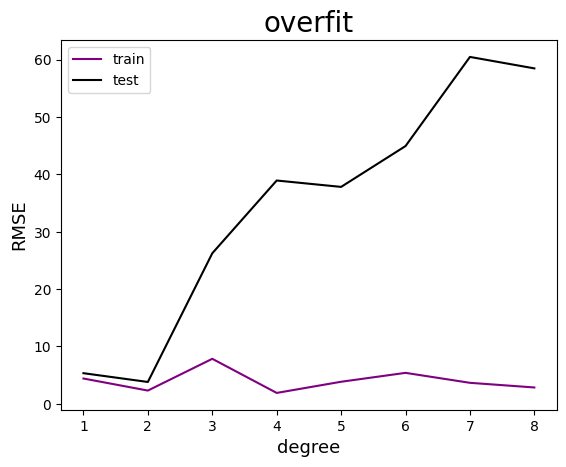

In [33]:
plt.plot(range(1,9),train_RMSE_List[:8],label='train',color='purple')
plt.plot(range(1,9),test_RMSE_List[:8],label='test',color='k')

plt.title('overfit',fontsize=20)
plt.xlabel('degree',fontsize=13)
plt.ylabel('RMSE',fontsize=13)

plt.legend()
plt.show()